In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [6]:
pip install factor-analyzer

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 417.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=dc131a82530faea5e3da30ed1e567a00bfeb794810759a06b359e2ca2771998c
  Stored in directory: c:\users\poornima\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.manifold import MDS

In [2]:
# Read the CSV file
survey_df = pd.read_csv('C:/Users/poornima/Downloads/Survey.csv')
print(survey_df.shape)
print(survey_df.columns)
print(survey_df.head())
print(survey_df.info())

(70, 50)
Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Av

In [3]:
# A) Principal Component Analysis and Factor Analysis

# Check for missing values
print(survey_df.isna().sum().sum())

# Select columns 20 to 46
sur_int = survey_df.iloc[:, 19:46]
print(sur_int.info())


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   3. Proximity to transport                  70 non-null     int64  
 1   4. Proximity to work place                 70 non-null     int64  
 2   5. Proximity to shopping                   70 non-null     int64  
 3   1. Gym/Pool/Sports facility                70 non-null     int64  
 4   2. Parking space                           70 non-null     int64  
 5   3.Power back-up                            70 non-null     int64  
 6   4.Water supply                             70 non-null     int64  
 7   5.Security                                 70 non-null     int64  
 8   1. Exterior look                           70 non-null     int64  
 9   2. Unit size                               70 non-null     int64  
 10  3. Interior design and bra

In [4]:
# PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int)
print(pca.explained_variance_ratio_)

# Factor Analysis
fa = FactorAnalyzer(n_factors=5, rotation='promax')
fa.fit(sur_int)
print(fa.loadings_)

[9.27394295e-01 7.25413292e-02 6.42132668e-05 1.32931069e-07
 1.98047817e-08]
[[-6.26497101e-02  5.34488547e-02  1.02690924e-01  5.66766290e-01
  -1.08953457e-01]
 [ 2.14466451e-01 -2.42324039e-01 -1.56117234e-02 -5.96429978e-02
   6.57571592e-01]
 [ 2.39691605e-02  6.46405962e-01  2.73362366e-01 -1.18424856e-01
   1.70156016e-01]
 [ 3.55079979e-02  4.97715530e-01 -1.23070175e-01  1.75301011e-01
   1.43681434e-01]
 [ 1.41554993e-01  4.58574266e-01 -1.52465990e-01 -3.40737293e-02
   1.44277318e-01]
 [ 3.38511448e-02  3.24155775e-01  2.58810650e-02 -1.00512053e-01
   5.58963339e-01]
 [ 3.34491880e-01  2.95377630e-01  3.23026249e-02  6.17495202e-01
   1.06282875e-01]
 [-2.47295386e-01  9.63297204e-01 -8.31312369e-02  3.19566600e-01
  -1.38278267e-01]
 [ 3.57561492e-01  4.13705722e-01  2.86870130e-01 -4.04234528e-01
  -1.26285931e-01]
 [ 3.07274334e-01 -8.66436515e-02 -9.66132308e-02 -3.99986113e-02
  -2.98122172e-01]
 [ 4.08980886e-01  3.85737789e-01 -4.60642235e-02 -1.09581500e-01
   1.0

[9.27394295e-01 7.25413292e-02 6.42132668e-05 1.32931069e-07
 1.98047817e-08]


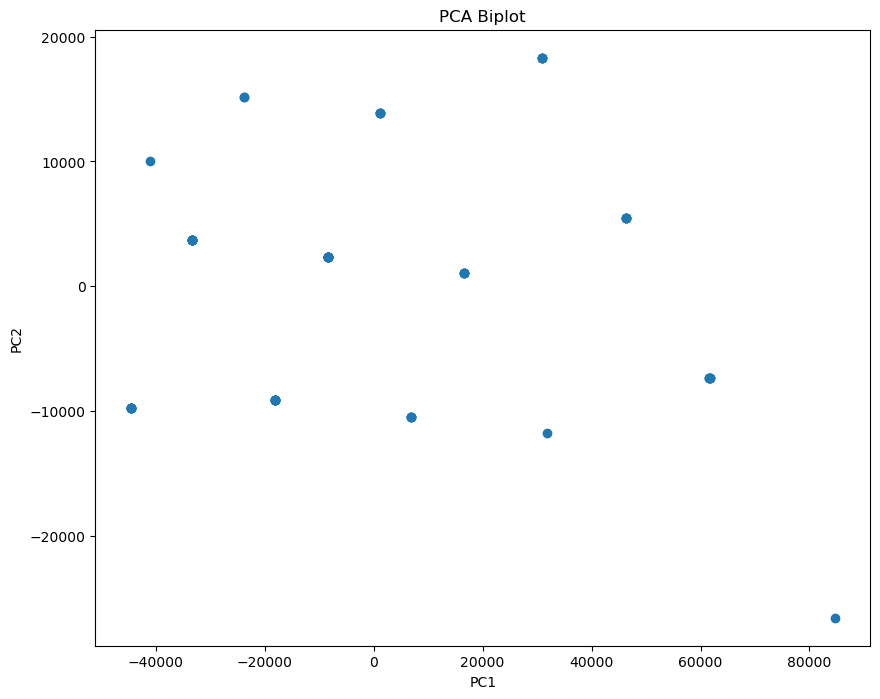

In [5]:
# PCA using FactoMineR equivalent
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int)
print(pca.explained_variance_ratio_)

# Biplot
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.show()

In [1]:
# B) Cluster Analysis

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sur_int)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


NameError: name 'sur_int' is not defined

In [2]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=123)
cluster_labels = kmeans.fit_predict(sur_int)

# Visualize clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.show()

NameError: name 'sur_int' is not defined

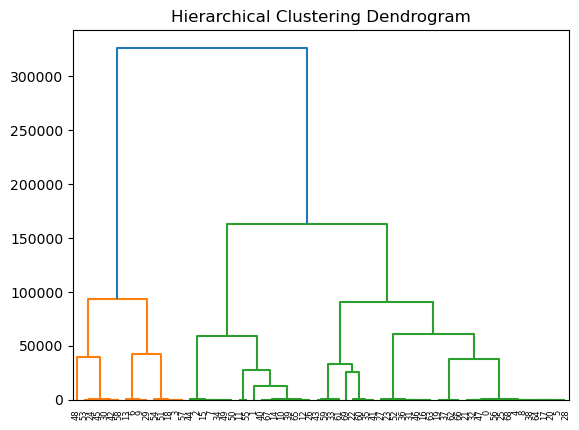

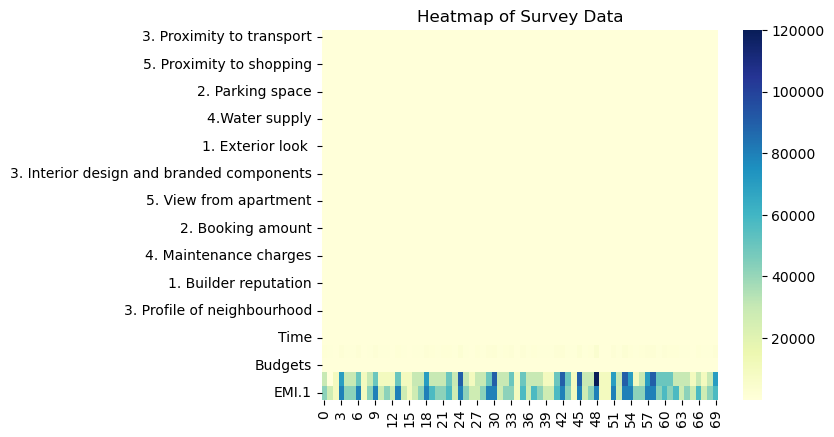

In [8]:
# Hierarchical clustering
linkage_matrix = linkage(sur_int, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Heatmap
sns.heatmap(sur_int.T, cmap='YlGnBu')
plt.title('Heatmap of Survey Data')
plt.show()

In [9]:
# Factor Analysis
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(sur_int)
loadings = fa.loadings_
print(loadings)

[[-0.08623576 -0.08097401  0.05315631  0.53865207]
 [-0.04707895  0.2817126  -0.01654391 -0.01672452]
 [ 0.6905913   0.14264745  0.28810838 -0.06920569]
 [ 0.46651738  0.16352419 -0.12485363  0.23247143]
 [ 0.51962226  0.24855044 -0.14283398  0.03864645]
 [ 0.36211264  0.23805115  0.04245436 -0.02913032]
 [ 0.34740792  0.36086054 -0.03312095  0.66001612]
 [ 0.75282619 -0.10094501 -0.08332     0.38469031]
 [ 0.67108356  0.29439858  0.30171479 -0.34424643]
 [ 0.06500835  0.14963681 -0.10846898 -0.01470873]
 [ 0.61153681  0.43213105 -0.04932627 -0.02471042]
 [ 0.40487718  0.55433415 -0.08677656 -0.09343655]
 [ 0.75646745  0.3287391  -0.0179094  -0.02725861]
 [ 0.05460304  0.40691287 -0.06720388  0.43833868]
 [ 0.080124   -0.01917882  0.51626193 -0.1381047 ]
 [-0.0867624  -0.05489172  0.52029275  0.24907907]
 [-0.04512192 -0.14102083  0.30281759 -0.048089  ]
 [-0.14555111  0.0072217   0.87170744 -0.09429573]
 [ 0.20355549  0.57780859 -0.15702556  0.23438127]
 [ 0.23101553  0.22844068  0.24

(10, 7)
Index(['Brand', 'Price', 'Availability', 'Taste', 'Flavour', 'Consistency',
       'Shelflife'],
      dtype='object')


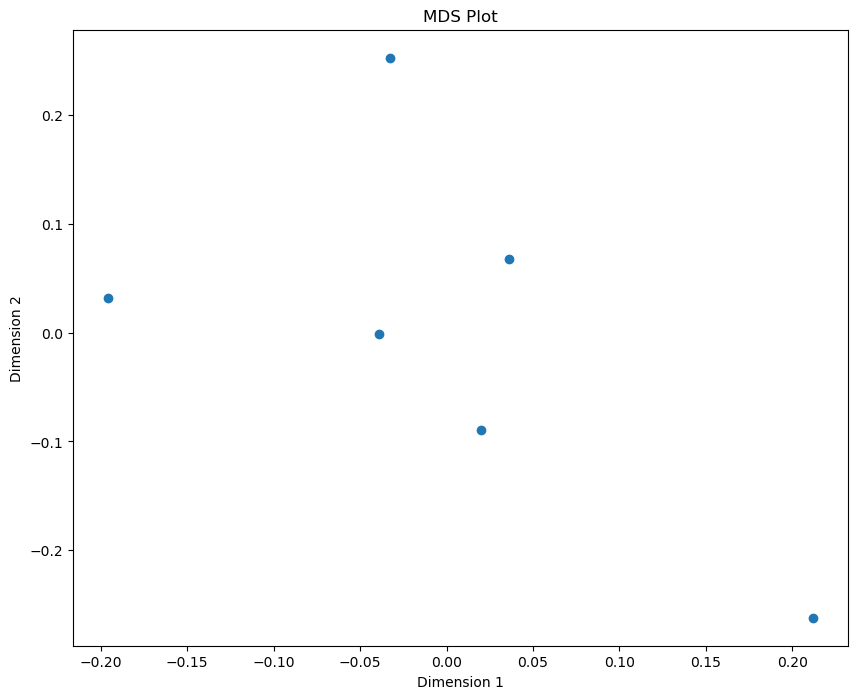

In [10]:
# C) Multidimensional Scaling

icecream_df = pd.read_csv('C:\\Users\\anjel\\Downloads\\icecream.csv')
print(icecream_df.shape)
print(icecream_df.columns)

ice = icecream_df.drop('Brand', axis=1)
distance_matrix = pd.DataFrame(ice).corr().values

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(distance_matrix)

plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Plot')
plt.show()

In [11]:
import pandas as pd, numpy as np



In [14]:
# Read the CSV file
df = pd.read_csv('C:/Users/poornima/Downloads/pizza_data.csv')

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model='ranking ~ C(brand,Sum)+C(price,Sum)+C(weight,Sum)+C(crust,Sum)+C(cheese,Sum)+C(size,Sum)+C(toppings,Sum)+C(spicy,Sum)'
model_fit=smf.ols(model,data=df).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Sun, 07 Jul 2024   Prob (F-statistic):             0.0794
Time:                        23:17:20   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

C:\Users\anjel\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
conjoint_attributes = ['brand','price','weight','crust','cheese','size','toppings','spicy']

In [17]:
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df[item])))
    level_name.append(list(np.unique(df[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration
print("-------------------------------------------------------------")
print("level name:")
print(level_name)
print("npw with sum element:")
print(new_part_worth)
print("imp level:")
print(important_levels)
print("part worth:")
print(part_worth)
print("part_worth_range:")
print(part_worth_range)
print(len(part_worth))
print("important levels:")
print(important_levels)

brand
price
weight
crust
cheese
size
toppings
spicy
-------------------------------------------------------------
level name:
[['Dominos', 'Onesta', 'Oven Story', 'Pizza hut'], ['$1.00', '$2.00', '$3.00', '$4.00'], ['100g', '200g', '300g', '400g'], ['thick', 'thin'], ['Cheddar', 'Mozzarella'], ['large', 'regular'], ['mushroom', 'paneer'], ['extra', 'normal']]
npw with sum element:
[0.749999999999999, -0.749999999999999]
imp level:
{'brand': 3, 'price': 0, 'weight': 0, 'crust': 0, 'cheese': 1, 'size': 1, 'toppings': 0, 'spicy': 0}
part worth:
[[-1.1102230246251565e-15, 7.327471962526033e-15, -0.25000000000000555, 0.24999999999999933], [0.7500000000000084, -9.992007221626409e-15, 3.9968028886505635e-15, -0.7500000000000024], [5.0, 1.9999999999999973, -1.2499999999999947, -5.750000000000003], [1.7499999999999996, -1.7499999999999996], [-0.2500000000000001, 0.2500000000000001], [-0.24999999999999883, 0.24999999999999883], [1.1249999999999978, -1.1249999999999978], [0.749999999999999, -0.74

In [18]:
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)

[2.38, 7.14, 51.19, 16.67, 2.38, 2.38, 10.71, 7.14]


In [19]:
part_worth_dict={}
attrib_level={}
for item,i in zip(conjoint_attributes,range(0,len(conjoint_attributes))):
    print("Attribute :",item)
    print("    Relative importance of attribute ",attribute_importance[i])
    print("    Level wise part worths: ")
    for j in range(0,len(level_name[i])):
        print(i)
        print(j)
        print("          {}:{}".format(level_name[i][j],part_worth[i][j]))
        part_worth_dict[level_name[i][j]]=part_worth[i][j]
        attrib_level[item]=(level_name[i])
        #print(j)
part_worth_dict

Attribute : brand
    Relative importance of attribute  2.38
    Level wise part worths: 
0
0
          Dominos:-1.1102230246251565e-15
0
1
          Onesta:7.327471962526033e-15
0
2
          Oven Story:-0.25000000000000555
0
3
          Pizza hut:0.24999999999999933
Attribute : price
    Relative importance of attribute  7.14
    Level wise part worths: 
1
0
          $1.00:0.7500000000000084
1
1
          $2.00:-9.992007221626409e-15
1
2
          $3.00:3.9968028886505635e-15
1
3
          $4.00:-0.7500000000000024
Attribute : weight
    Relative importance of attribute  51.19
    Level wise part worths: 
2
0
          100g:5.0
2
1
          200g:1.9999999999999973
2
2
          300g:-1.2499999999999947
2
3
          400g:-5.750000000000003
Attribute : crust
    Relative importance of attribute  16.67
    Level wise part worths: 
3
0
          thick:1.7499999999999996
3
1
          thin:-1.7499999999999996
Attribute : cheese
    Relative importance of attribute  2.38
    Level wise 

{'Dominos': -1.1102230246251565e-15,
 'Onesta': 7.327471962526033e-15,
 'Oven Story': -0.25000000000000555,
 'Pizza hut': 0.24999999999999933,
 '$1.00': 0.7500000000000084,
 '$2.00': -9.992007221626409e-15,
 '$3.00': 3.9968028886505635e-15,
 '$4.00': -0.7500000000000024,
 '100g': 5.0,
 '200g': 1.9999999999999973,
 '300g': -1.2499999999999947,
 '400g': -5.750000000000003,
 'thick': 1.7499999999999996,
 'thin': -1.7499999999999996,
 'Cheddar': -0.2500000000000001,
 'Mozzarella': 0.2500000000000001,
 'large': -0.24999999999999883,
 'regular': 0.24999999999999883,
 'mushroom': 1.1249999999999978,
 'paneer': -1.1249999999999978,
 'extra': 0.749999999999999,
 'normal': -0.749999999999999}

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

NameError: name 'conjoint_attributes' is not defined

<Figure size 1000x500 with 0 Axes>

In [21]:
utility = []
for i in range(df.shape[0]):
    score = part_worth_dict[df['brand'][i]]+part_worth_dict[df['price'][i]]+part_worth_dict[df['weight'][i]]+part_worth_dict[df['crust'][i]]+part_worth_dict[df['cheese'][i]]+part_worth_dict[df['size'][i]]+part_worth_dict[df['toppings'][i]]+part_worth_dict[df['spicy'][i]]
    utility.append(score)
    
df['utility'] = utility
utility

[2.6250000000000093,
 3.3750000000000044,
 0.37500000000000033,
 -6.375000000000003,
 -0.37500000000000944,
 4.375000000000007,
 -1.3749999999999791,
 -4.624999999999996,
 -3.6250000000000147,
 7.6249999999999885,
 -5.3749999999999885,
 -2.3750000000000133,
 1.3750000000000053,
 6.374999999999997,
 -7.625000000000003,
 5.624999999999996]

In [22]:
print("The profile that has the highest utility score :",'\n', df.iloc[np.argmax(utility)])

The profile that has the highest utility score : 
 brand       Oven Story
price            $4.00
weight            100g
crust            thick
cheese      Mozzarella
size             large
toppings      mushroom
spicy            extra
ranking             16
utility          7.625
Name: 9, dtype: object


In [23]:
for i,j in zip(attrib_level.keys(),range(0,len(conjoint_attributes))):
    #print(i)
    #level_name[j]
    print("Preferred level in {} is :: {}".format(i,level_name[j][important_levels[i]]))

Preferred level in brand is :: Pizza hut
Preferred level in price is :: $1.00
Preferred level in weight is :: 100g
Preferred level in crust is :: thick
Preferred level in cheese is :: Mozzarella
Preferred level in size is :: regular
Preferred level in toppings is :: mushroom
Preferred level in spicy is :: extra
